In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-set-smokers/sample_submission.csv
/kaggle/input/data-set-smokers/train.csv
/kaggle/input/data-set-smokers/test.csv
/kaggle/input/predicting-smoker-status-using-bio-signals/sample_submission.csv
/kaggle/input/predicting-smoker-status-using-bio-signals/train.csv
/kaggle/input/predicting-smoker-status-using-bio-signals/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
train = pd.read_csv("/kaggle/input/predicting-smoker-status-using-bio-signals/train.csv")
train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,40.0,155.0,55.0,75.0,0.6,0.7,1.0,1.0,118.0,...,57.0,98.0,13.4,1.0,0.6,21.0,21.0,25.0,0.0,0.0
1,1,45.0,155.0,45.0,69.8,0.7,0.8,1.0,1.0,120.0,...,63.0,133.0,13.5,1.0,0.8,14.0,14.0,16.0,0.0,0.0
2,2,50.0,160.0,50.0,69.0,1.5,0.9,1.0,1.0,117.0,...,80.0,123.0,12.5,1.0,0.8,27.0,17.0,17.0,0.0,0.0
3,3,40.0,150.0,35.0,59.0,0.8,0.5,1.0,1.0,101.0,...,76.0,114.0,12.1,1.0,0.9,20.0,13.0,16.0,0.0,0.0
4,4,40.0,160.0,50.0,65.0,1.0,0.9,1.0,1.0,96.0,...,57.0,100.0,13.9,1.0,0.9,24.0,20.0,13.0,0.0,0.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  int64  
 1   age                  15000 non-null  float64
 2   height(cm)           15000 non-null  float64
 3   weight(kg)           15000 non-null  float64
 4   waist(cm)            15000 non-null  float64
 5   eyesight(left)       15000 non-null  float64
 6   eyesight(right)      15000 non-null  float64
 7   hearing(left)        15000 non-null  float64
 8   hearing(right)       15000 non-null  float64
 9   systolic             15000 non-null  float64
 10  relaxation           15000 non-null  float64
 11  fasting blood sugar  15000 non-null  float64
 12  Cholesterol          15000 non-null  float64
 13  triglyceride         15000 non-null  float64
 14  HDL                  15000 non-null  float64
 15  LDL                  15000 non-null 

In [5]:
train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000
mean,7499.500000,42.693000,164.684667,64.304667,80.251327,1.032107,1.026213,1.005400,1.006133,119.310600,...,57.552600,113.042267,14.510027,1.015267,0.86710,22.258200,20.988400,26.33960,0.140133,0.371200
std,4330.271354,10.528223,8.566726,10.995510,7.869669,0.293653,0.299816,0.073288,0.078078,11.209328,...,11.459906,18.533179,1.391993,0.154386,0.16683,5.852414,10.465395,19.22105,0.347137,0.483142
min,0.000000,20.000000,140.000000,35.000000,57.000000,0.100000,0.100000,1.000000,1.000000,82.000000,...,25.000000,1.000000,6.900000,1.000000,0.00000,9.000000,1.000000,1.00000,0.000000,0.000000
25%,3749.750000,40.000000,160.000000,55.000000,75.000000,0.800000,0.800000,1.000000,1.000000,110.000000,...,49.000000,100.000000,13.500000,1.000000,0.80000,18.000000,14.000000,15.00000,0.000000,0.000000
50%,7499.500000,40.000000,165.000000,65.000000,80.000000,1.000000,1.000000,1.000000,1.000000,119.000000,...,56.000000,112.000000,14.700000,1.000000,0.90000,21.000000,18.000000,21.00000,0.000000,0.000000
75%,11249.250000,50.000000,170.000000,70.000000,85.500000,1.200000,1.200000,1.000000,1.000000,128.000000,...,65.000000,126.000000,15.600000,1.000000,1.00000,25.000000,25.000000,31.00000,0.000000,1.000000
max,14999.000000,85.000000,190.000000,115.000000,113.000000,9.900000,9.900000,2.000000,2.000000,186.000000,...,110.000000,194.000000,18.200000,4.000000,1.60000,193.000000,202.000000,635.00000,1.000000,1.000000


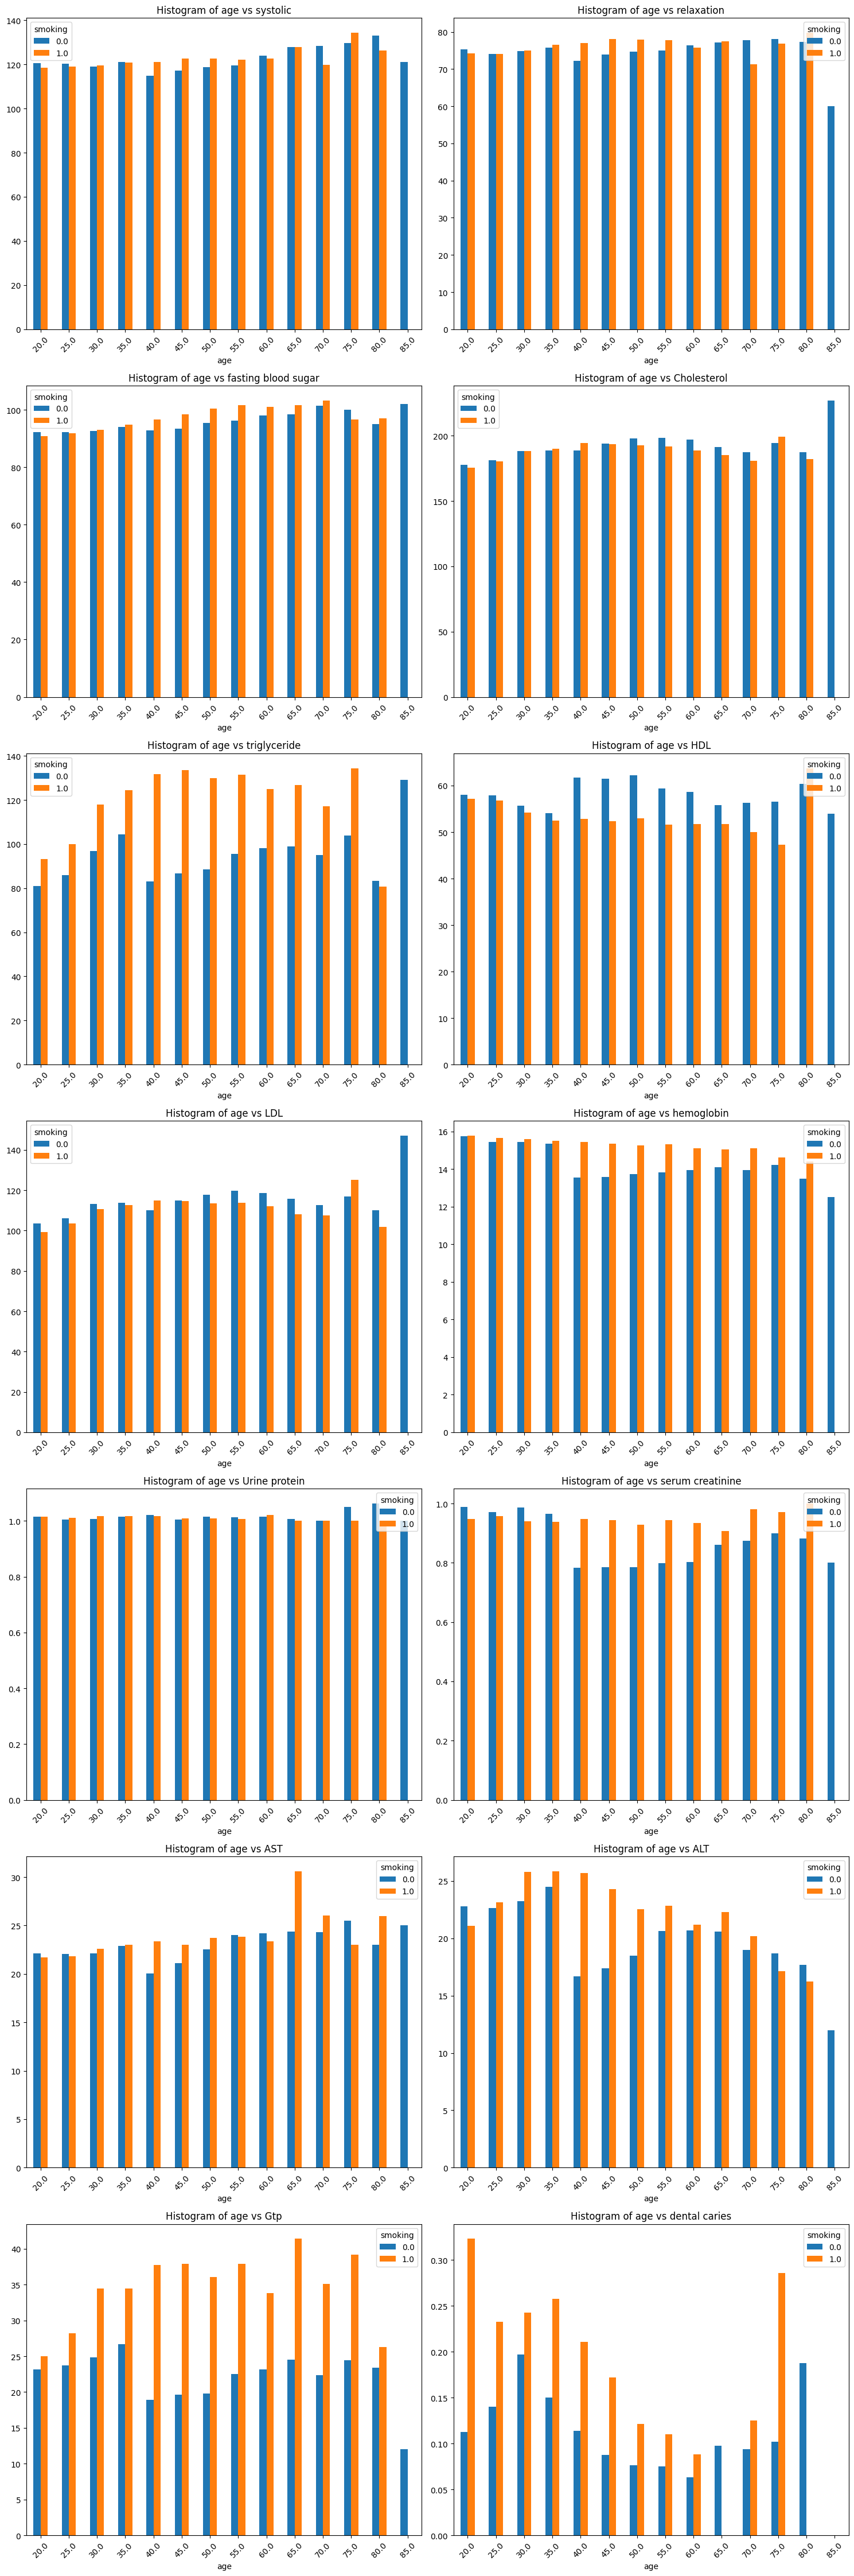

In [6]:
for i, col in enumerate(train.columns[9:-1], 1):
    plt.subplot(7, 2, i)
    train.pivot_table(index = "age", columns = "smoking", values = col, aggfunc = "mean").plot.bar(rot = 45, ax = plt.gca(), figsize = (15, 45))
    plt.title(f"Histogram of age vs {col}")
    plt.tight_layout()
    plt.plot()

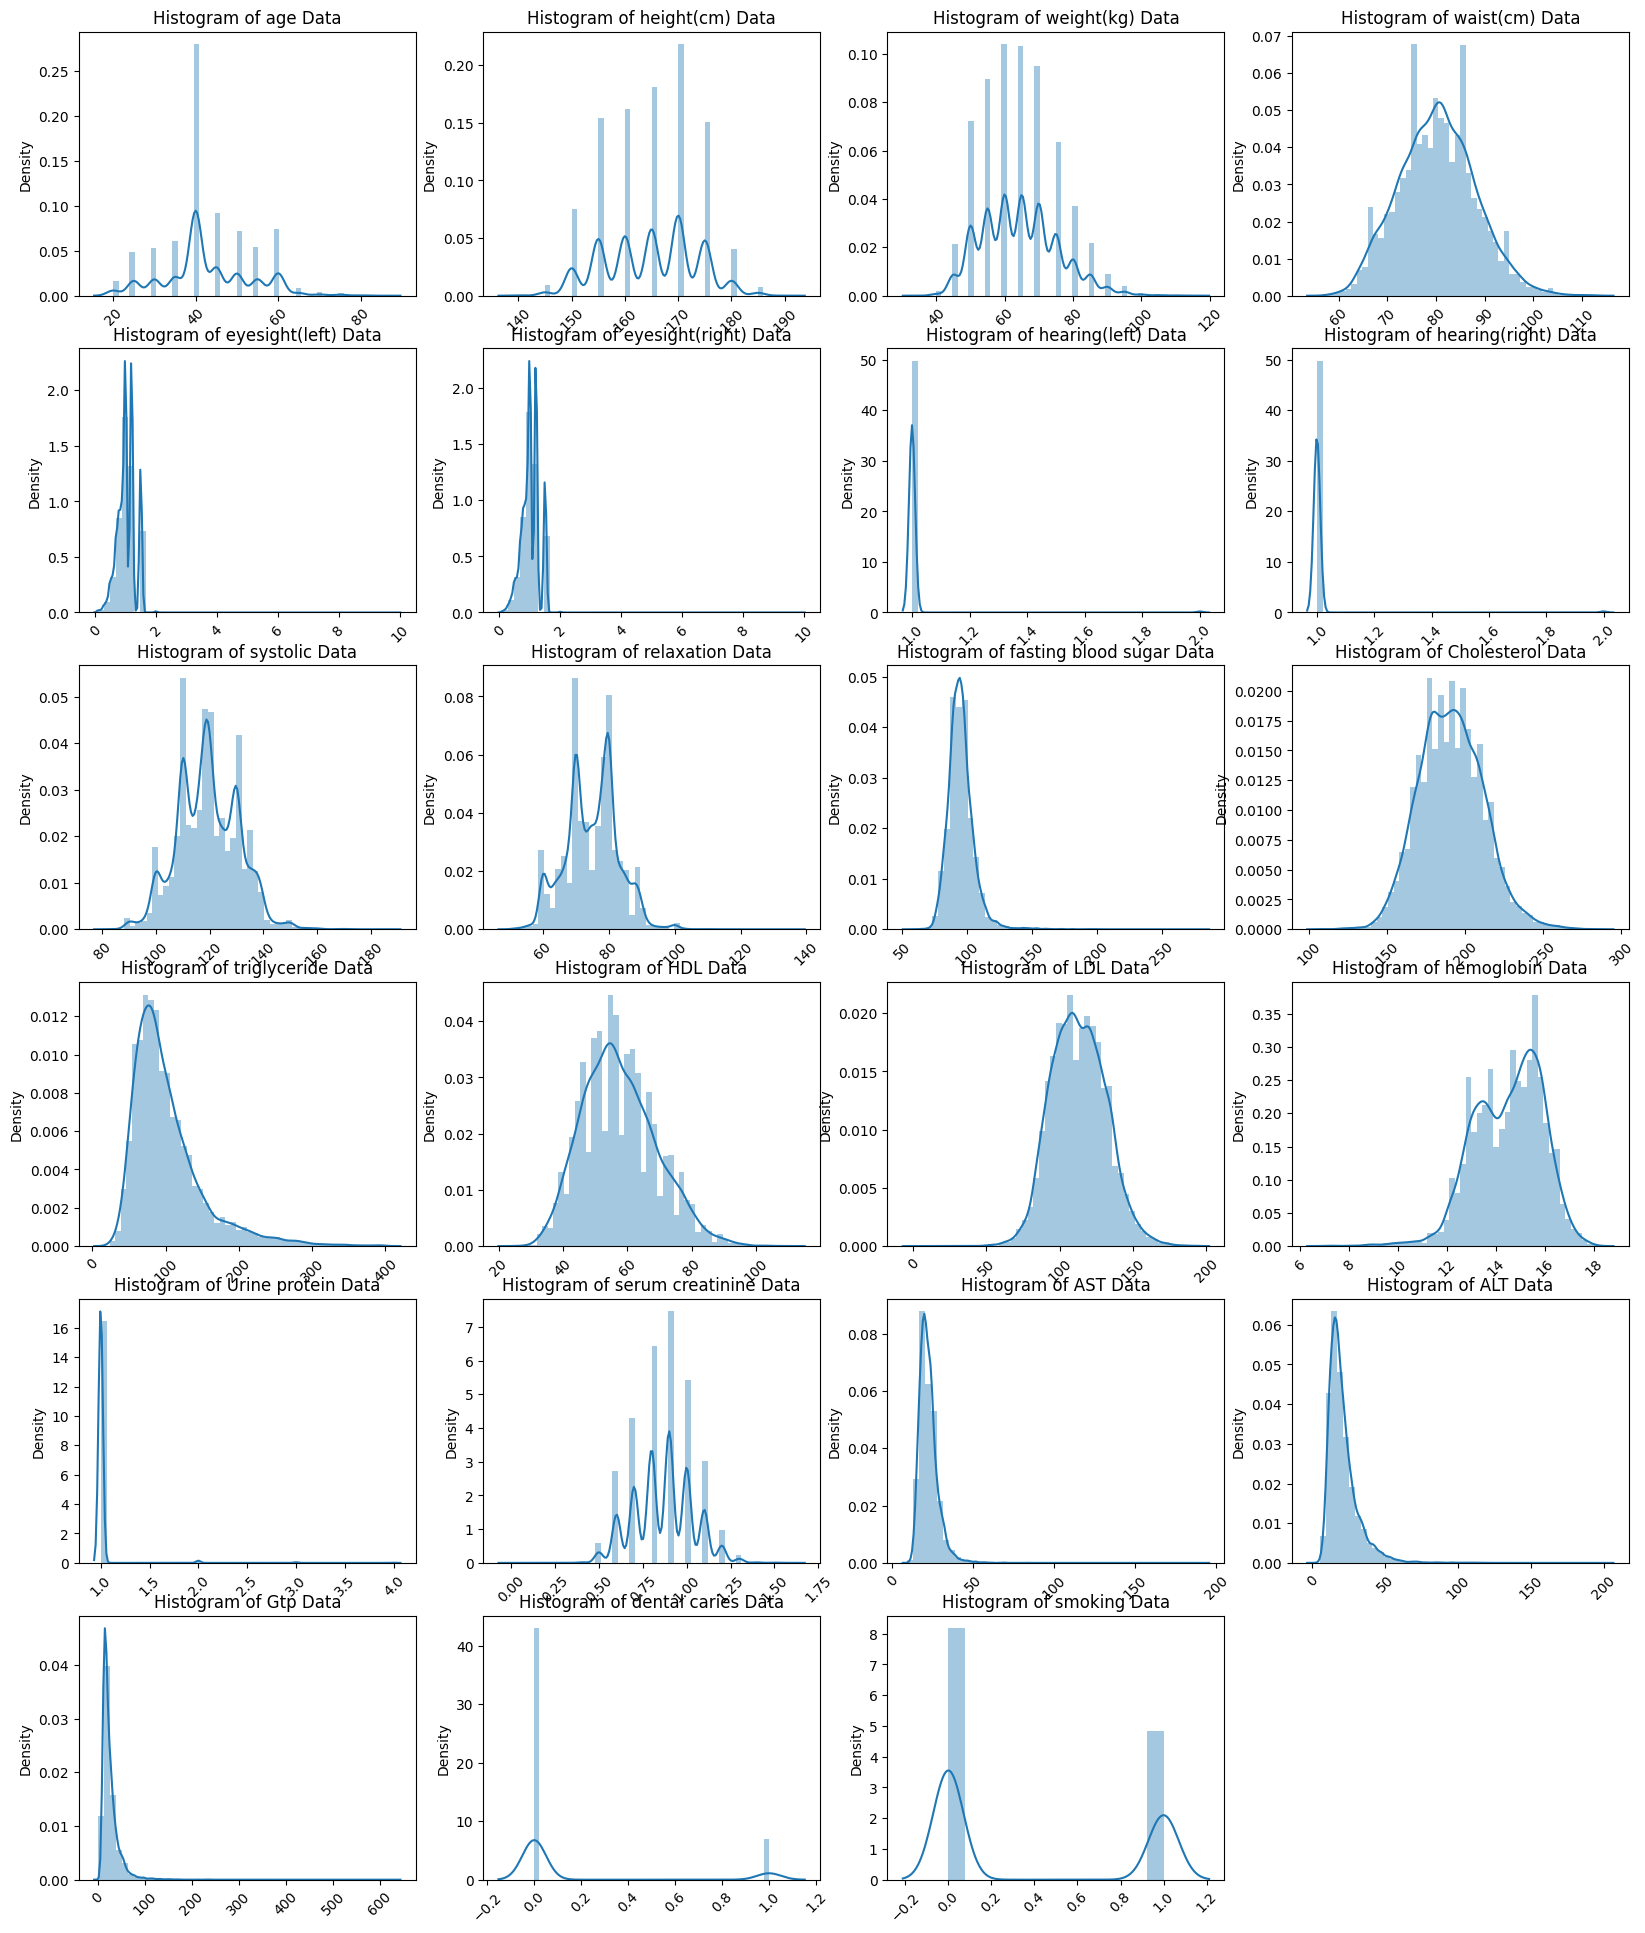

In [7]:
plt.figure(figsize = (20,24))
for i, col in enumerate(train.columns[1:], 1):
    plt.subplot(6, 4, i)
    sns.distplot(x = train[col])
    plt.title(f"Histogram of {col} Data")
    plt.xticks(rotation = 45)
    plt.plot()

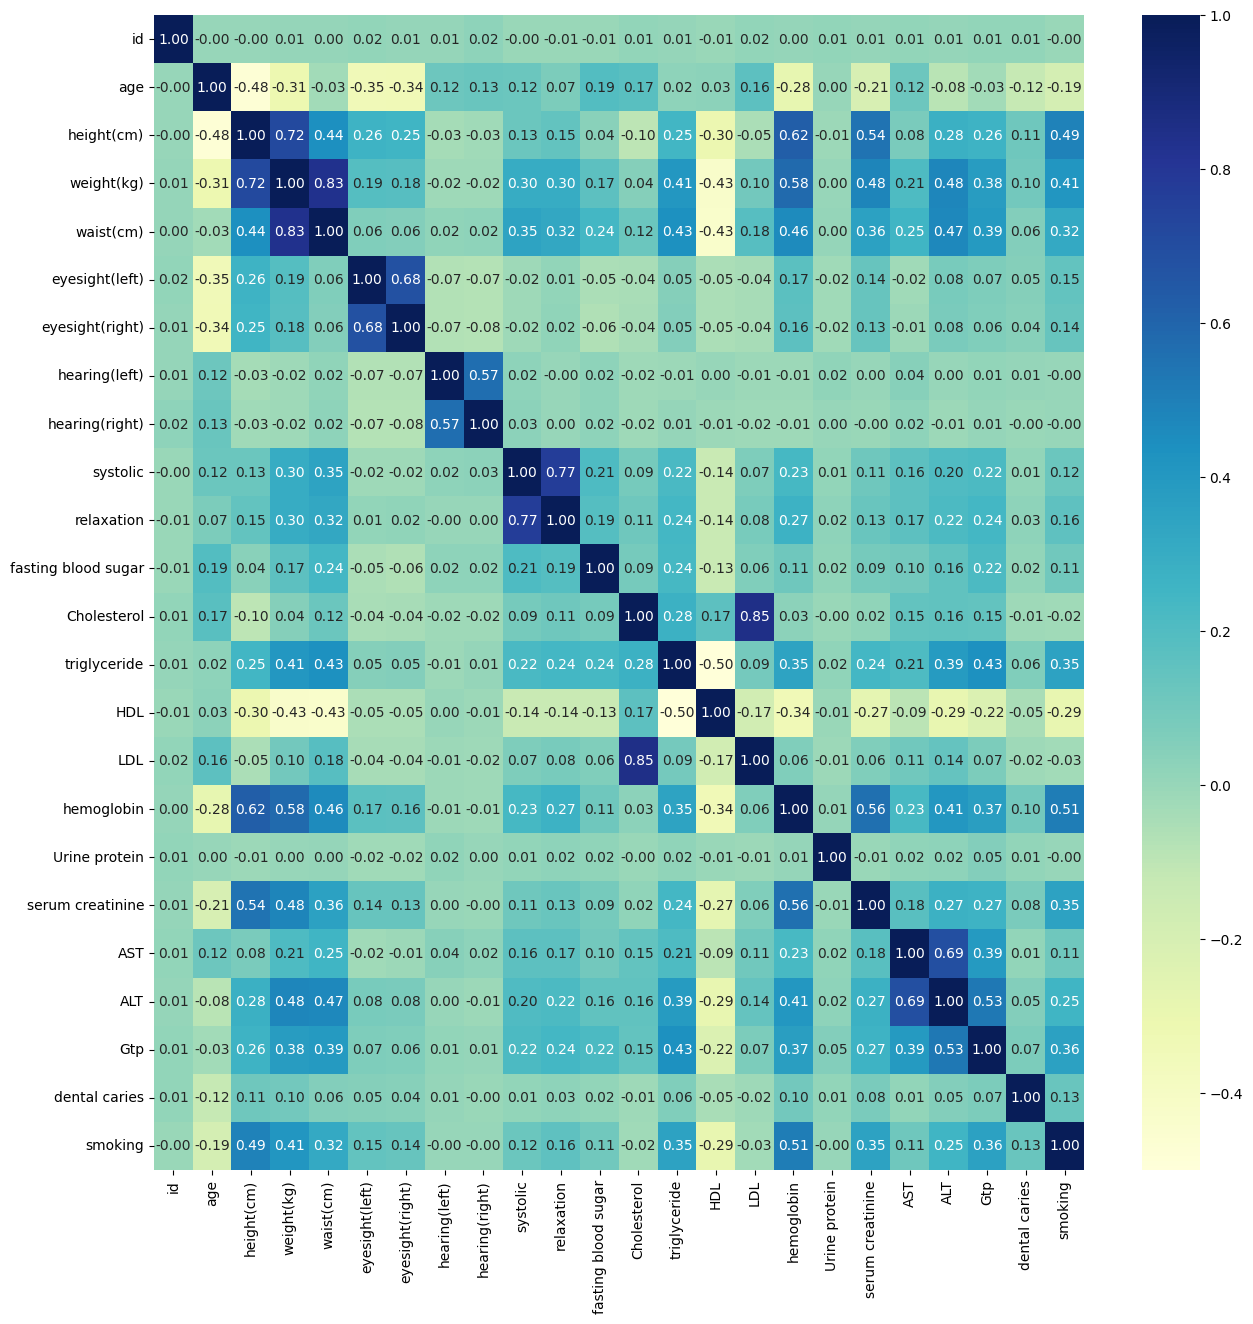

In [8]:
train_corr = train.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(train_corr, fmt = ".2f", annot = True, cmap = "YlGnBu")
plt.show()

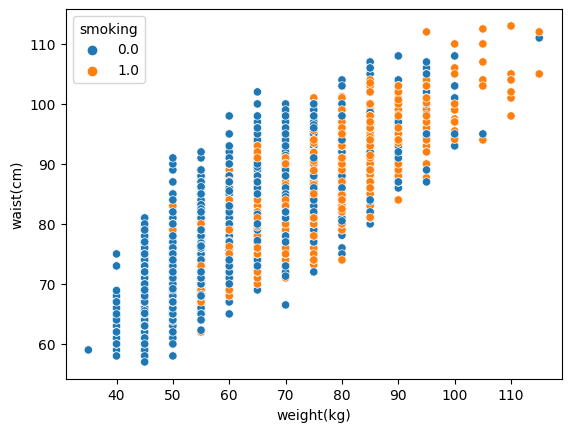

In [9]:
sns.scatterplot(x = train["weight(kg)"], y = train["waist(cm)"], hue = train["smoking"])
plt.show()

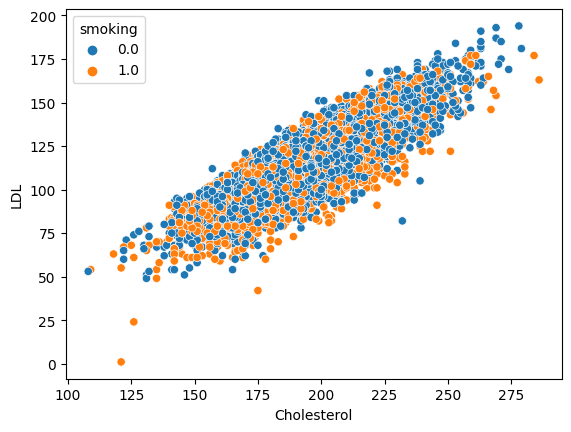

In [10]:
sns.scatterplot(x = train["Cholesterol"], y = train["LDL"], hue = train["smoking"])
plt.show()

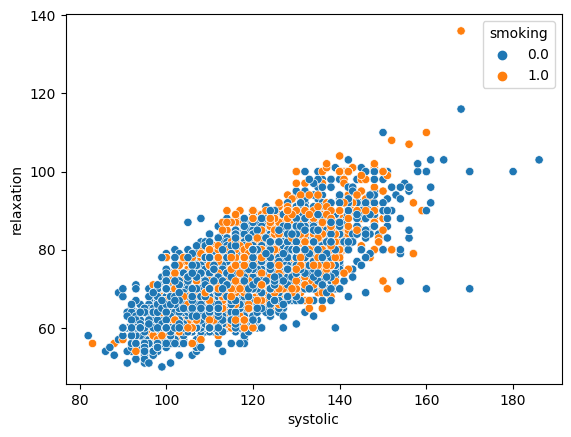

In [11]:
sns.scatterplot(x = train["systolic"], y = train["relaxation"], hue = train["smoking"])
plt.show()

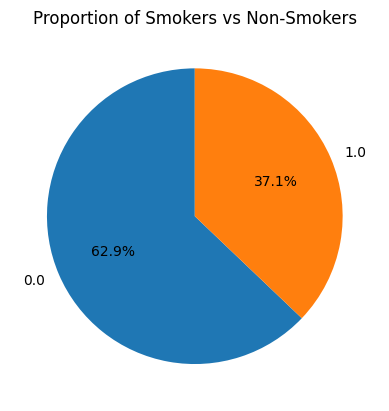

In [12]:
smoking_counts = train["smoking"].value_counts()


plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90)


plt.title("Proportion of Smokers vs Non-Smokers")


plt.show()

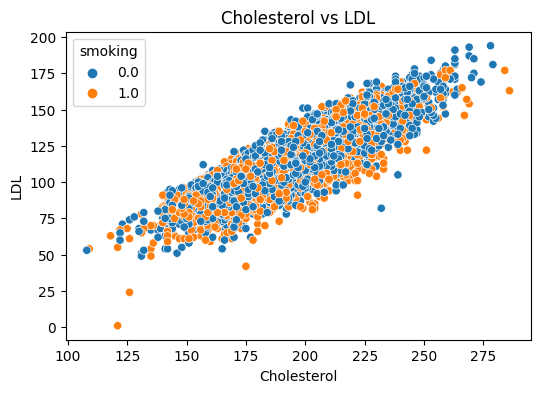

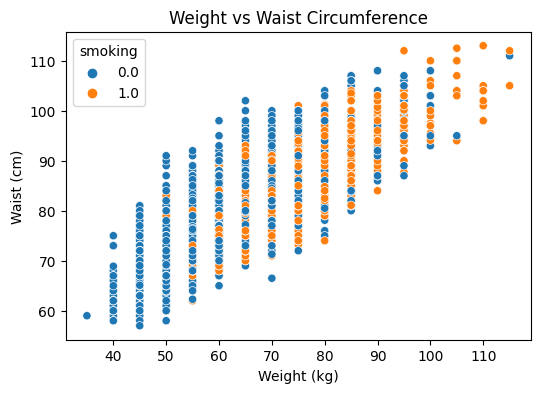

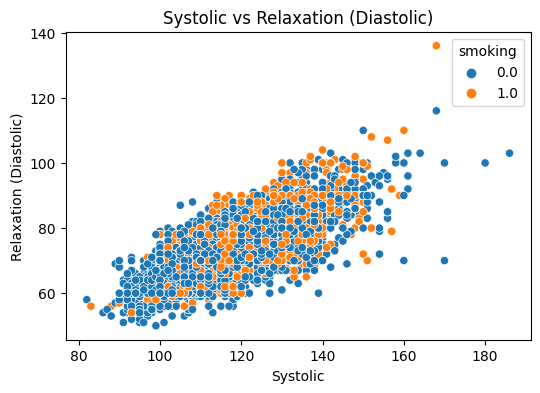

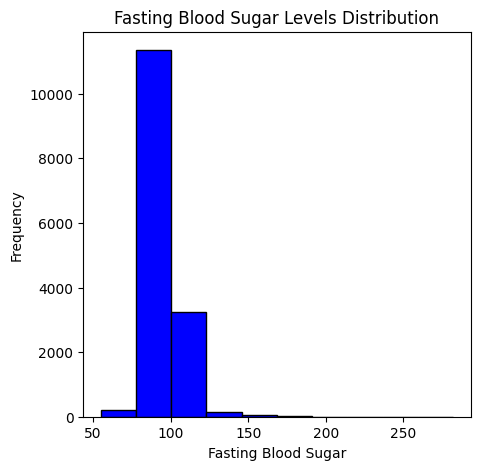

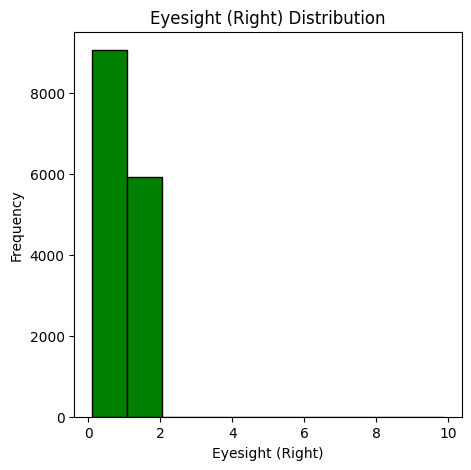

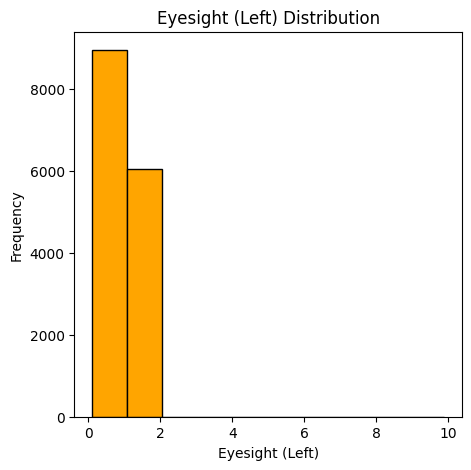

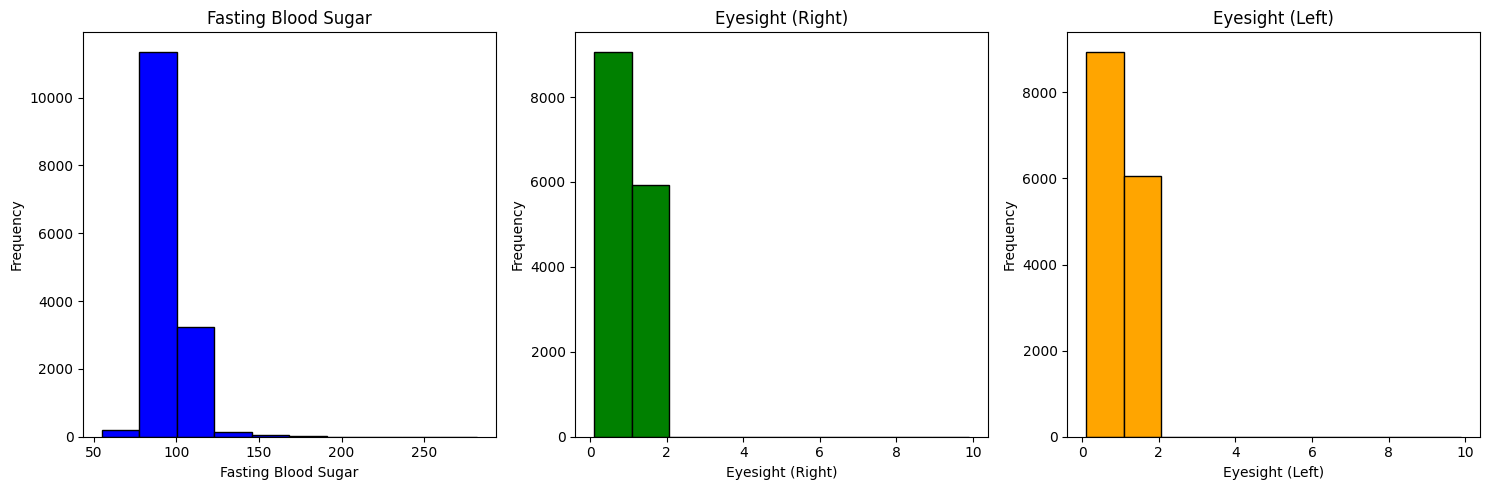

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot 1: Cholesterol vs LDL with Smoking Status
plt.figure(figsize=(6, 4))
sns.scatterplot(x=train["Cholesterol"], y=train["LDL"], hue=train["smoking"])
plt.title("Cholesterol vs LDL")
plt.xlabel("Cholesterol")
plt.ylabel("LDL")
plt.show()

# Scatter Plot 2: Weight vs Waist Circumference with Smoking Status
plt.figure(figsize=(6, 4))
sns.scatterplot(x=train["weight(kg)"], y=train["waist(cm)"], hue=train["smoking"])
plt.title("Weight vs Waist Circumference")
plt.xlabel("Weight (kg)")
plt.ylabel("Waist (cm)")
plt.show()

# Scatter Plot 3: Systolic vs Relaxation (Diastolic) with Smoking Status
plt.figure(figsize=(6, 4))
sns.scatterplot(x=train["systolic"], y=train["relaxation"], hue=train["smoking"])
plt.title("Systolic vs Relaxation (Diastolic)")
plt.xlabel("Systolic")
plt.ylabel("Relaxation (Diastolic)")
plt.show()

# Fasting Blood Sugar

plt.figure(figsize=(5, 5))
plt.hist(train["fasting blood sugar"], bins=10, color='blue', edgecolor='black')
plt.title("Fasting Blood Sugar Levels Distribution")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Frequency")
plt.show()

#  Eyesight (Right)

plt.figure(figsize=(5, 5))
plt.hist(train["eyesight(right)"], bins=10, color='green', edgecolor='black')
plt.title("Eyesight (Right) Distribution")
plt.xlabel("Eyesight (Right)")
plt.ylabel("Frequency")
plt.show()

#  Eyesight (Left)

plt.figure(figsize=(5, 5))
plt.hist(train["eyesight(left)"], bins=10, color='orange', edgecolor='black')
plt.title("Eyesight (Left) Distribution")
plt.xlabel("Eyesight (Left)")
plt.ylabel("Frequency")
plt.show()

# Final Layout: All Histograms Combined in Subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Fasting Blood Sugar 
axs[0].hist(train["fasting blood sugar"], bins=10, color='blue', edgecolor='black')
axs[0].set_title("Fasting Blood Sugar")
axs[0].set_xlabel("Fasting Blood Sugar")
axs[0].set_ylabel("Frequency")

# Eyesight Right 
axs[1].hist(train["eyesight(right)"], bins=10, color='green', edgecolor='black')
axs[1].set_title("Eyesight (Right)")
axs[1].set_xlabel("Eyesight (Right)")
axs[1].set_ylabel("Frequency")

# Eyesight Left 
axs[2].hist(train["eyesight(left)"], bins=10, color='orange', edgecolor='black')
axs[2].set_title("Eyesight (Left)")
axs[2].set_xlabel("Eyesight (Left)")
axs[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [14]:
X = train.iloc[:, 1:-1]
y = train.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<Axes: >

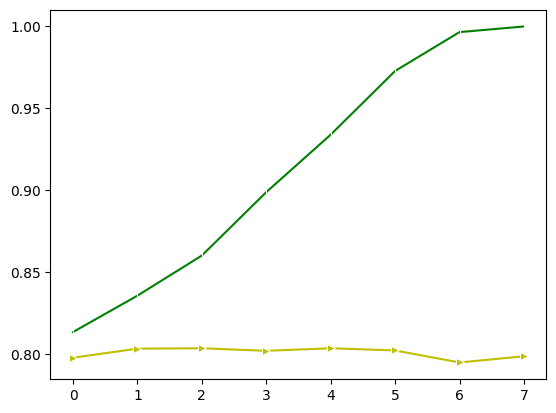

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
train_scores = []
test_scores = []
for i in range(2, 10):
    gbc = GradientBoostingClassifier(max_depth = i+1, max_features = i*0.05, min_samples_split = i)
    gbc.fit(X_train, y_train)
    train_scores.append(gbc.score(X_train, y_train))
    test_scores.append(gbc.score(X_test, y_test))
sns.lineplot(train_scores, marker = '|', color = 'g')
sns.lineplot(test_scores, marker = '>', color = 'y')

In [17]:
# i = 6
gbc = GradientBoostingClassifier(max_depth = 10, max_features = 0.45, min_samples_split = 6)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features=0.45, min_samples_split=6)

In [18]:
test = pd.read_csv("/kaggle/input/predicting-smoker-status-using-bio-signals/train.csv")
test.drop("id", axis = 1, inplace = True)
test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,40.0,155.0,55.0,75.0,0.6,0.7,1.0,1.0,118.0,75.0,...,57.0,98.0,13.4,1.0,0.6,21.0,21.0,25.0,0.0,0.0
1,45.0,155.0,45.0,69.8,0.7,0.8,1.0,1.0,120.0,69.0,...,63.0,133.0,13.5,1.0,0.8,14.0,14.0,16.0,0.0,0.0
2,50.0,160.0,50.0,69.0,1.5,0.9,1.0,1.0,117.0,65.0,...,80.0,123.0,12.5,1.0,0.8,27.0,17.0,17.0,0.0,0.0
3,40.0,150.0,35.0,59.0,0.8,0.5,1.0,1.0,101.0,68.0,...,76.0,114.0,12.1,1.0,0.9,20.0,13.0,16.0,0.0,0.0
4,40.0,160.0,50.0,65.0,1.0,0.9,1.0,1.0,96.0,59.0,...,57.0,100.0,13.9,1.0,0.9,24.0,20.0,13.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,35.0,170.0,75.0,88.9,1.2,1.0,1.0,1.0,110.0,62.0,...,32.0,135.0,14.4,1.0,0.8,16.0,16.0,51.0,0.0,1.0
14996,45.0,155.0,55.0,72.0,1.2,0.9,1.0,1.0,113.0,80.0,...,60.0,124.0,14.6,1.0,0.8,20.0,16.0,13.0,0.0,0.0
14997,35.0,175.0,80.0,84.0,0.9,1.0,1.0,1.0,110.0,70.0,...,48.0,88.0,14.3,1.0,0.8,19.0,16.0,15.0,0.0,1.0
14998,35.0,170.0,60.0,74.0,1.0,1.5,1.0,1.0,110.0,60.0,...,55.0,104.0,15.2,1.0,1.0,18.0,22.0,18.0,0.0,0.0


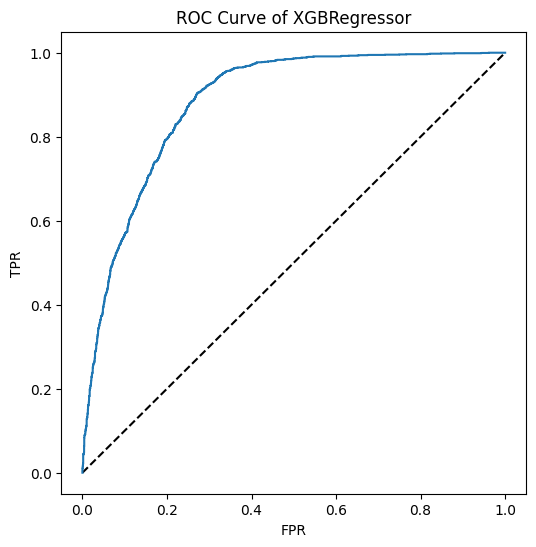

In [19]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (6, 6))
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "XGBRegressor")
plt.title("ROC Curve of XGBRegressor")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
y_gbc_pred_prob = gbc.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_gbc_pred_prob)

0.8831525569784323

In [21]:
# NOW DATA CLEANING

Missing values in each column:
id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64
Number of duplicate rows: 0
Cleaned Dataset:
   id   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0  40.0       155.0        55.0       75.0             0.6   
1   1  45.0       155.0        45.0       69.8             0.7   
2   2  50.0       160.0        50.0       69.0             1.5   
3   3  40.0       150.0        35.0       59.0 

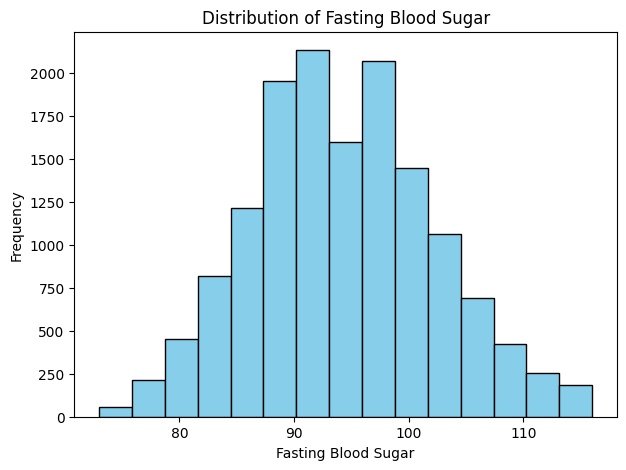

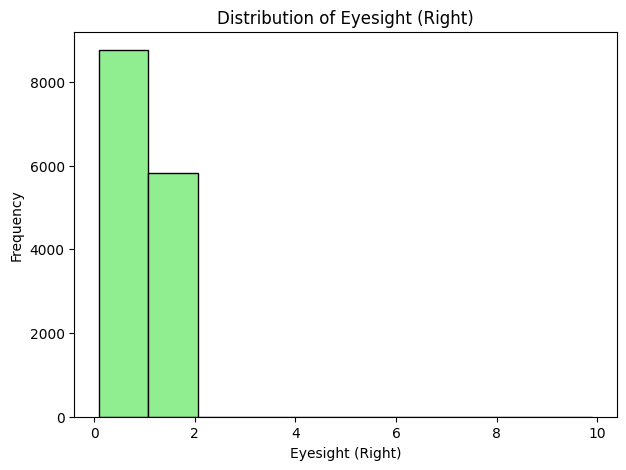

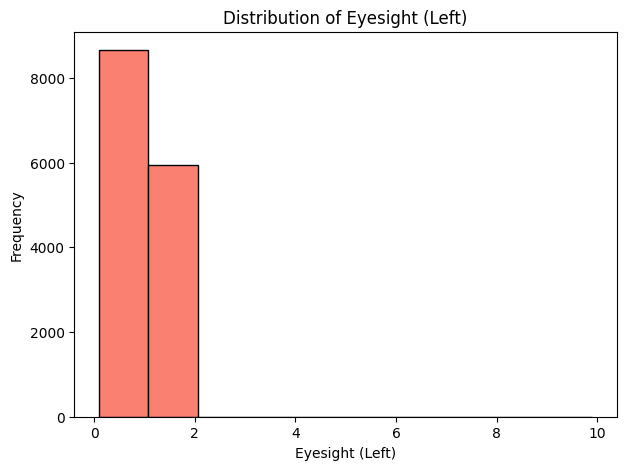

In [22]:


#  Check for missing values
print("Missing values in each column:")
print(train.isnull().sum())

#  Handle missing values
#  Drop rows with missing values (if there are only a few)
train_cleaned = train.dropna()

#  Fill missing values with a specific value 
train_filled = train.fillna({
    "fasting blood sugar": train["fasting blood sugar"].mean(),  # Fill with mean for continuous columns
    "eyesight(right)": train["eyesight(right)"].mode()[0],       # Fill with mode for categorical columns
    "eyesight(left)": train["eyesight(left)"].mode()[0]
})

#  Handle duplicates
print(f"Number of duplicate rows: {train.duplicated().sum()}")
train_cleaned = train_cleaned.drop_duplicates()

#  Correct data types (if necessary)

train_cleaned["fasting blood sugar"] = pd.to_numeric(train_cleaned["fasting blood sugar"], errors='coerce')

# Outlier Detection {for continuous numerical columns}
# there Using IQR to detect outliers in "fasting blood sugar"
Q1 = train_cleaned["fasting blood sugar"].quantile(0.25)
Q3 = train_cleaned["fasting blood sugar"].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
train_cleaned = train_cleaned[(train_cleaned["fasting blood sugar"] >= Q1 - 1.5 * IQR) & (train_cleaned["fasting blood sugar"] <= Q3 + 1.5 * IQR)]


# Convert the 'smoking' column to string and then apply .str.lower()
train_cleaned["smoking"] = train_cleaned["smoking"].astype(str).str.lower()

# Drop irrelevant columns (if any)
#  If there is an "ID" column that isn’t needed
train_cleaned = train_cleaned.drop(columns=["ID"], errors='ignore')



# Final cleaned dataset
print("Cleaned Dataset:")
print(train_cleaned.head())


# Plot histogram for "fasting blood sugar"
plt.figure(figsize=(7, 5))
plt.hist(train_cleaned["fasting blood sugar"], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Frequency')
plt.show()

#  Plot histogram for"eyesight(right)"
plt.figure(figsize=(7, 5))
plt.hist(train_cleaned["eyesight(right)"], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Eyesight (Right)')
plt.xlabel('Eyesight (Right)')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for "eyesight(left)"
plt.figure(figsize=(7, 5))
plt.hist(train_cleaned["eyesight(left)"], bins=10, color='salmon', edgecolor='black')
plt.title('Distribution of Eyesight (Left)')
plt.xlabel('Eyesight (Left)')
plt.ylabel('Frequency')
plt.show()


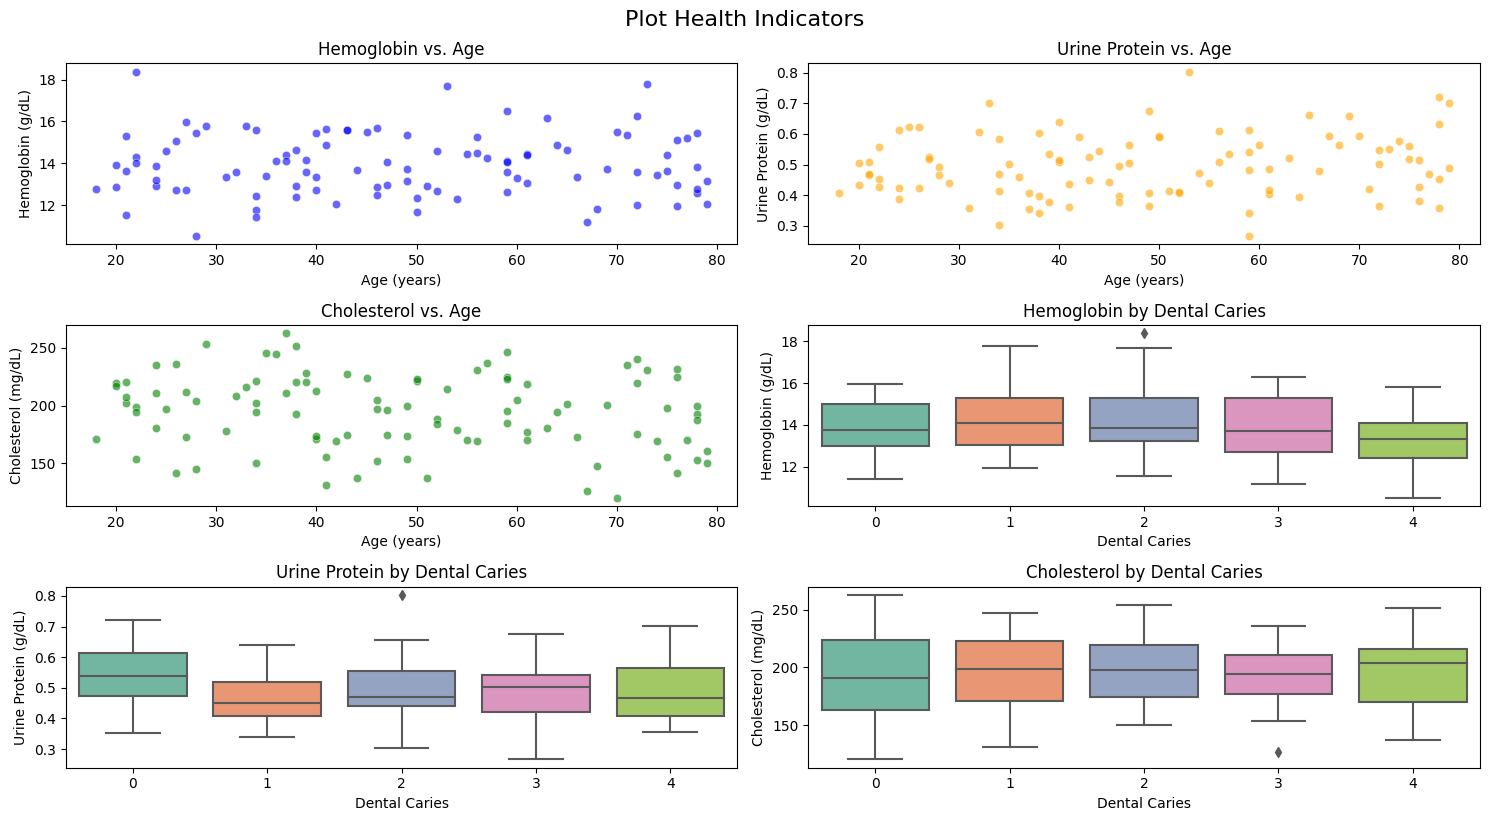

In [23]:

import numpy as np


# Sample data 
data = {
    'hemoglobin': np.random.normal(14, 1.5, 100),  
    'urine protein': np.random.normal(0.5, 0.1, 100),  
    'cholesterol': np.random.normal(200, 30, 100), 
    'dental caries': np.random.randint(0, 5, 100),  
    'age': np.random.randint(18, 80, 100),  
    'height(cm)': np.random.normal(170, 10, 100), 
    'waist(cm)': np.random.normal(80, 10, 100)  
}

train = pd.DataFrame(data)


# Convert categorical data for dental caries to a categorical type
train['dental caries'] = train['dental caries'].astype('category')

#  Manhattan Plot
plt.figure(figsize=(15, 8))

plt.subplot(3, 2, 1)
sns.scatterplot(x='age', y='hemoglobin', data=train, color='blue', alpha=0.6)
plt.title('Hemoglobin vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Hemoglobin (g/dL)')

plt.subplot(3, 2, 2)
sns.scatterplot(x='age', y='urine protein', data=train, color='orange', alpha=0.6)
plt.title('Urine Protein vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Urine Protein (g/dL)')

plt.subplot(3, 2, 3)
sns.scatterplot(x='age', y='cholesterol', data=train, color='green', alpha=0.6)
plt.title('Cholesterol vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Cholesterol (mg/dL)')

plt.subplot(3, 2, 4)
sns.boxplot(x='dental caries', y='hemoglobin', data=train, palette='Set2')
plt.title('Hemoglobin by Dental Caries')
plt.xlabel('Dental Caries')
plt.ylabel('Hemoglobin (g/dL)')

plt.subplot(3, 2, 5)
sns.boxplot(x='dental caries', y='urine protein', data=train, palette='Set2')
plt.title('Urine Protein by Dental Caries')
plt.xlabel('Dental Caries')
plt.ylabel('Urine Protein (g/dL)')

plt.subplot(3, 2, 6)
sns.boxplot(x='dental caries', y='cholesterol', data=train, palette='Set2')
plt.title('Cholesterol by Dental Caries')
plt.xlabel('Dental Caries')
plt.ylabel('Cholesterol (mg/dL)')

# Adjust layout
plt.tight_layout()
plt.suptitle('Plot Health Indicators', fontsize=16, y=1.02)
plt.show()
